In [9]:
import pandas as pd
import cairo
import numpy as np
import math
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt

In [10]:
# create attribute list
# easy for this file because the first 6 columns are in fact attribute list
attr_list = pd.read_csv('HTTLPR.csv', usecols=[0, 1, 2, 3, 4, 5])
attr_list['PaperID'] = attr_list.index

In [11]:
data = pd.read_csv("HTTLPR.csv") #reading the .csv file (excel spreadsheet)
new = pd.DataFrame(np.zeros(shape=(73, 73)), columns=data['Study'], index=data['Study']) #making a data frame

In [12]:
# create edge list
matrix = pd.read_csv('HTTLPR.csv')
matrix = matrix.iloc[:, 6:]

In [13]:
# search_for_alias
search_dict = pd.Series(attr_list['PaperID'].values, index=attr_list['Study']).to_dict()
search_dict_reverse = pd.Series(attr_list['Study'].values, index=attr_list['PaperID']).to_dict()
matrix.columns = [search_dict[x] for x in matrix.columns]

In [14]:
for a in data['Study']:
    for b, v in zip(data['Study'],data[a]):
        if v == 'X':
            new.at[a, b] = 1
print(len(b))

9


In [15]:
#g = nx.generators.directed.kamada_kawai_layout(75, 3, 0.5)
g = nx.generators.directed.random_k_out_graph(75, 3, 0.5)
pos = nx.layout.spring_layout(g)

In [16]:
#node_sizes = [10 + i for i in range(len(g))]
M = g.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [i for i in range(M)]

In [17]:
study = attr_list['Study'].to_list()
outcome = attr_list['Outcome'].to_list()

In [18]:
coloring = []
for node in g:
    if node < 0.1:
        coloring.append('pink')
    elif node > 0.9:
        coloring.append('green')
    else:
        coloring.append('blue')

In [19]:
labelss = {}
for i, val in enumerate(study):
    labelss[i] = val

In [20]:
edge_list = []
for i in range(0, matrix.shape[0]):
    for j in range(0, matrix.shape[1]):
        if isinstance(matrix.iloc[i, j], str):
            s = matrix.iloc[i, j]
            if s.replace(" ", "") == "X":
                edge_list.append((i, j))

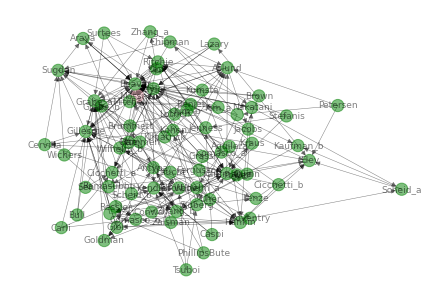

In [21]:
nx.draw(
    g,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

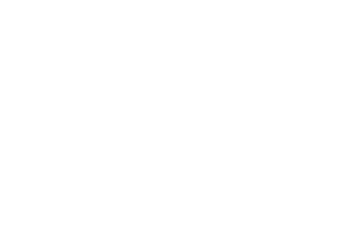

In [22]:
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [23]:
g_sim = nx.generators.directed.random_k_out_graph(75, 2, 0.5)
sim_edge_list = []
year_gap = 2

In [24]:
# degree centrality (IN) for graph g
g_degree = nx.in_degree_centrality(g)

In [25]:
type(g_degree)

dict

In [26]:
for i in year:
    #print("i = ", i)
    for j in range(len(year)):
        if year[j] - i >= year_gap:
            sim_edge_list.append((year[j], i))

NameError: name 'year' is not defined

In [27]:
print(len(sim_edge_list))

0


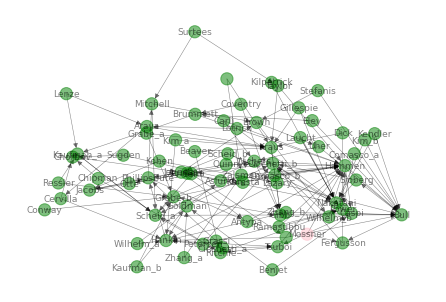

In [28]:
nx.draw(
    g_sim,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

In [ ]:
plt.show()

In [ ]:
g_degree = nx.in_degree_centrality(g)
print(g_degree)
g_sim_degree = nx.in_degree_centrality(g_sim)

In [ ]:
last_generation = []
for idx, degree in enumerate(g_degree):
    if g_sim_degree[idx]!=0:
        degree_ratio = degree_ratio.append({'paperID': idx, 'degree_ratio': round(g_degree[idx] / g_sim_degree[idx],3)}, ignore_index=True)
    else:
        last_generation.append(idx)

In [ ]:
low_cutoff = 0.1
high_cutoff = 0.9
idx_low = degree_ratio[degree_ratio['degree_ratio'] < low_cutoff].index.tolist()
idx_low = [int(item) for item in idx_low]

In [15]:
# when you get sim_g working, then 
# g_sim_degree = nx.in_degree_centrality(g_sim)

In [16]:
# if you have both g_degree and g_sim_degree
# you can calculate degree_ratio

<BarContainer object of 0 artists>

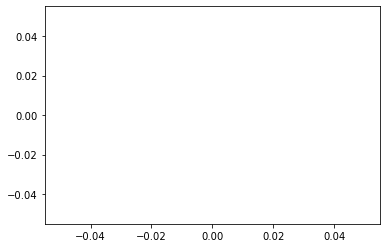

In [17]:
degree_ratio = pd.DataFrame(columns=['paperID','degree_ratio'])
plt.bar(degree_ratio['paperID'], degree_ratio['degree_ratio'], width=0.80, color="b")

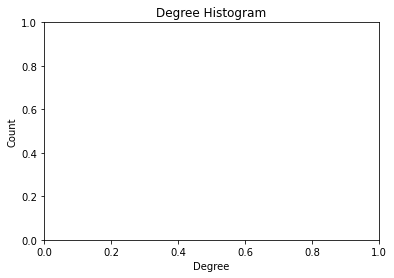

In [18]:
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()